# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exploratory-Data-Analysis-(EDA)-Module" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-Module-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA) Module</a></div><div class="lev2 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></div><div class="lev2 toc-item"><a href="#Column-Description" data-toc-modified-id="Column-Description-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Column Description</a></div><div class="lev2 toc-item"><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Analysis</a></div><div class="lev2 toc-item"><a href="#Column-Drill-down" data-toc-modified-id="Column-Drill-down-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Column Drill-down</a></div>

# Exploratory Data Analysis (EDA) Module

In [1]:
import os
import sys
import time
import json
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)
%precision 3
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.disable(logging.ERROR)

In [3]:
import edatools.edatools as eda

## Load Data

In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [5]:
titanic['survived'] = titanic['survived'].replace({0:"Died", 1:"Survived"})

In [6]:
eb = eda.RawTable(titanic)

## Column Description

In [7]:
eb.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,Died,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,Survived,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,Survived,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,Survived,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,Died,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,Died,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,Died,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,Died,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,Survived,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,Survived,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
eb.colinfo()

,DataType,ValueCount,NullCount,0,1,2
survived,object,2,0,Died,Survived,Survived
pclass,int64,3,0,3,1,3
sex,object,2,0,male,female,female
age,float64,88,177,22,38,26
sibsp,int64,7,0,1,1,0
parch,int64,7,0,0,0,0
fare,float64,248,0,7.25,71.2833,7.925
embarked,object,3,2,S,C,S
class,object,3,0,Third,First,Third
who,object,3,0,man,woman,woman


In [9]:
eb.desc()

/Users/jinyoung.kim/Package/Conda36/anaconda/envs/py27/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


In [10]:
eb.desc_detail(['fare', 'class', 'pclass', 'sex', 'survived'], figsize=(6,4));

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
10%,7.550000
25%,7.910400
50%,14.454200
75%,31.000000
90%,77.958300
max,512.329200


## Correlation Analysis

In [11]:
eb.corr()

,pclass,age,sibsp,parch,fare,adult_male,alone
pclass,1,-0.362,-0.043,-0.023,-0.688,0.099,0.136
age,-0.362,1,-0.182,-0.254,0.135,0.258,0.167
sibsp,-0.043,-0.182,1,0.45,0.447,-0.308,-0.828
parch,-0.023,-0.254,0.45,1,0.41,-0.397,-0.684
fare,-0.688,0.135,0.447,0.41,1,-0.309,-0.531
adult_male,0.099,0.258,-0.308,-0.397,-0.309,1,0.405
alone,0.136,0.167,-0.828,-0.684,-0.531,0.405,1


,age,sibsp,parch,fare,adult_male,alone
fare,0.135051,0.447113,0.410074,1.0,-0.308894,-0.531472


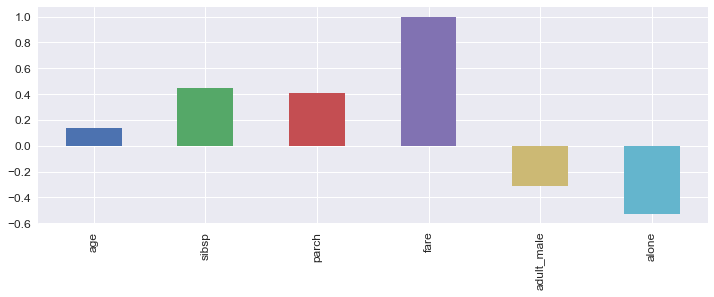

In [12]:
eb.corr_with('fare')

In [13]:
eb.pairplot(['pclass','fare','age'])

In [14]:
eb.pairplot_scatter_with_hover("fare", "age", color='survived', hover_cols=['pclass', 'sex'], 
                               alpha=0.5, size=10, figsize=(600,400))

""


## Column Drill-down

You can also divide the table into sub-groups and run the same analysis as below

In [15]:
for e in eb.groupby("class"):
    e.corr(['who','fare','age'])
    e.desc(['who','fare','age'])

,fare,age
fare,1,-0.287
age,-0.287,1


,fare,age
fare,1,-0.165
age,-0.165,1


,fare,age
fare,1,-0.244
age,-0.244,1


In [16]:
eb.pivot_ui()